<a href="https://colab.research.google.com/github/ehrupok97/COVID-R2/blob/master/Alzheimer_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
!unzip -q "/content/gdrive/My Drive/data4.zip"

In [ ]:
test_path='/content/data4/test'
train_path='/content/data4/train'

In [ ]:
import pandas as pd
import nibabel as nib
import numpy as np 
import os
from keras import layers
from keras import models
from keras import optimizers
from keras import backend as K
from sklearn.metrics import roc_curve,roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [ ]:
#train_data= np.zeros((540,91,109,91),dtype=float)
train_reserved= np.array([], dtype='float64').reshape(0,91,109,91)
train_levels_reserved=np.array([], dtype='int32').reshape(0,1)
#test_data= np.zeros((148,91,109,91),dtype=float)
test_data= np.array([], dtype='float64').reshape(0,91,109,91)
test_labels=np.array([], dtype='int32').reshape(0,1)

In [ ]:
###train data loading
#k=0;
for j in ['/content/data4/train/non demented/','/content/data4/train/demented/']:
  
  if j=='/content/data4/train/non demented/':
    train_levels_reserved=np.vstack([train_levels_reserved,np.ones((len(os.listdir(path=j)),1))])
  else:
    train_levels_reserved=np.vstack([train_levels_reserved,np.zeros((len(os.listdir(path=j)),1))])
  for i in os.listdir(path=j):
    data=nib.load(j+i)
    data= np.array(data.dataobj).reshape(1,91,109,91)
    #test_data=np.concatenate((test_data,data),axis=0)
    train_reserved=np.vstack([train_reserved, data])
    #train_data[k,:,:,:]=np.array(data.dataobj)
    #k=k+1

In [ ]:
###test data loading
#k=0;
for j in ['/content/data4/test/non demented/','/content/data4/test/demented/']:
  if j=='/content/data4/test/non demented/':
    test_labels=np.vstack([test_labels,np.ones((len(os.listdir(path=j)),1))])
  else:
    test_labels=np.vstack([test_labels,np.zeros((len(os.listdir(path=j)),1))])
  
  
  for i in os.listdir(path=j):
    data=nib.load(j+i)
    data= np.array(data.dataobj).astype(float).reshape(1,91,109,91)
    #test_data=np.concatenate((test_data,data),axis=0)
    test_data=np.vstack([test_data, data])
    #test_data[k,:,:,:]=np.array(data.dataobj)
    #k=k+1

In [ ]:
print(len(os.listdir(path='/content/data4/train/demented/')))
print(len(os.listdir(path='/content/data4/train/non demented/')))
print(len(os.listdir(path='/content/data4/test/demented/')))
print(len(os.listdir(path='/content/data4/test/non demented/')))
print(train_reserved.shape)
print(train_levels_reserved.shape)

40
40
16
16
(80, 91, 109, 91)
(80, 1)


In [ ]:
train_data=train_reserved
train_labels=train_levels_reserved
print(train_data.shape)
print(train_labels.shape)
print(np.count_nonzero(train_labels))
print(test_data.shape)
print(test_labels.shape)

(80, 91, 109, 91)
(80, 1)
40
(32, 91, 109, 91)
(32, 1)


In [ ]:
# To determine which version you're using:
!pip show tensorflow

# For the current version: 
#!pip install --upgrade tensorflow

# For a specific version:
#!pip install tensorflow==1.15

# For the latest nightly build:
#!pip install tf-nightly

Name: tensorflow
Version: 1.15.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.6/dist-packages
Requires: tensorflow-estimator, termcolor, protobuf, absl-py, keras-applications, astor, wheel, wrapt, six, tensorboard, keras-preprocessing, numpy, grpcio, google-pasta, opt-einsum, gast
Required-by: stable-baselines, magenta, fancyimpute


In [ ]:
###BASIC CNN architecture

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(91, 109, 91)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])







Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [ ]:
###training of the model
history=model.fit(train_data,train_labels,epochs=50,batch_size=10,validation_split=0.1,verbose=1,shuffle=True)




Train on 72 samples, validate on 8 samples
Epoch 1/50





72/72 [==============================] - 6s 81ms/step - loss: 0.6834 - acc: 0.6528 - val_loss: 0.6177 - val_acc: 0.6250
Epoch 2/50
72/72 [==============================] - 5s 68ms/step - loss: 0.5372 - acc: 0.7500 - val_loss: 0.2123 - val_acc: 1.0000
Epoch 3/50
72/72 [==============================] - 5s 69ms/step - loss: 0.5098 - acc: 0.7917 - val_loss: 0.2146 - val_acc: 1.0000
Epoch 4/50
72/72 [==============================] - 5s 68ms/step - loss: 0.4688 - acc: 0.7639 - val_loss: 0.6572 - val_acc: 0.6250
Epoch 5/50
72/72 [==============================] - 5s 69ms/step - loss: 0.4484 - acc: 0.7917 - val_loss: 0.0952 - val_acc: 1.0000
Epoch 6/50
72/72 [==============================] - 5s 68ms/step - loss: 0.4777 - acc: 0.7500 - val_loss: 0.5488 - val_acc: 0.6250
Epoch 7/50
72/72 [==============================] - 5s 68ms/step - loss: 0.3796 - acc: 0.8056 - val_loss: 0.4297 - val_acc: 0.6250
Epoch 8/50
72/72 [==============

In [ ]:
###Evaluting the accuracy of model
[score,acc] = model.evaluate(test_data,test_labels, batch_size=10)
print('accuracy of the model is ',acc)

32/32 [==============================] - 0s 15ms/step
accuracy of the model is  0.8124999925494194


In [ ]:
def confu_matrix(model,test_data=test_data,test_labels=test_labels):
  pred=model.predict_classes(test_data)
  cm = confusion_matrix(test_labels, pred, labels=[1,0])
  print('confusion matrix\n',cm)
  print(classification_report(test_labels, pred, target_names=['demented','non demented']))
  plt.figure()
  ax= plt.subplot()
  sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

  # labels, title and ticks
  ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
  ax.set_title('Confusion Matrix'); 
  ax.xaxis.set_ticklabels(['non demented', 'demented']); ax.yaxis.set_ticklabels(['non demented','demented' ]);

In [ ]:
def plot_roc_curve(model,test_data=test_data,test_labels=test_labels):
  pred=model.predict_proba(test_data)
  fpr , tpr , thresholds = roc_curve ( test_labels , pred)
  auc_score=roc_auc_score(test_labels,pred)
  print("the percentage of this area that is under this ROC curve",auc_score)
  plt.figure()
  plt.plot(fpr,tpr) 
  plt.axis([0,1,0,1]) 
  plt.xlabel('False Positive Rate') 
  plt.ylabel('True Positive Rate')   

In [ ]:
def plot_acc(histroy):
  plt.figure()
  plt.plot(history.history['acc'])
  plt.plot(history.history['val_acc'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'validation'], loc='upper left')
  plt.show()
  plt.figure()
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'validation'], loc='upper left')
  plt.show()

In [ ]:
def performance(model,history):
  plot_roc_curve(model)
  confu_matrix(model)
  plot_acc(history)

the percentage of this area that is under this ROC curve 0.9765625
confusion matrix
 [[16  0]
 [ 6 10]]
              precision    recall  f1-score   support

    demented       1.00      0.62      0.77        16
non demented       0.73      1.00      0.84        16

    accuracy                           0.81        32
   macro avg       0.86      0.81      0.81        32
weighted avg       0.86      0.81      0.81        32



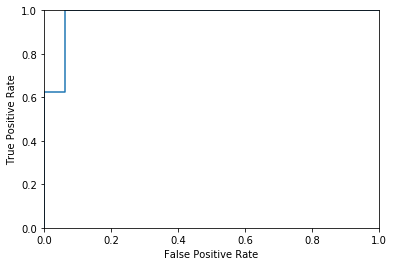

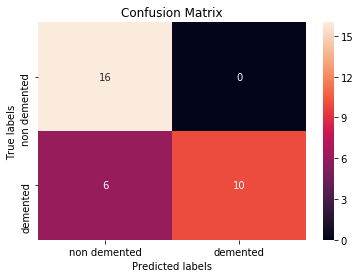

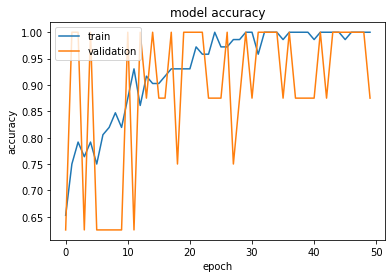

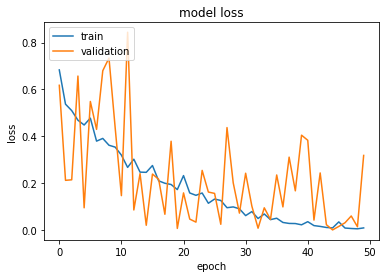

In [ ]:
performance(model,history)

In [ ]:
K.clear_session()
del model
del history

In [ ]:
from keras.layers import Input
input_tensor = Input(shape=(91,109,91))

In [ ]:
### VGG16 
from keras.applications import VGG16

input_tensor = Input(shape=(91,109,91))
conv_base = VGG16(weights=None,include_top=False,input_tensor=input_tensor)
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 91, 109, 91)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 91, 109, 64)       52480     
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 91, 109, 64)       36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 45, 54, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 45, 54, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 45, 54, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 22, 27, 128)       0     

In [ ]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.summary()
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 2, 3, 512)         14765376  
_________________________________________________________________
flatten_1 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               393344    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 15,158,849
Trainable params: 15,158,849
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history=model.fit(train_data,train_labels,epochs=50,batch_size=10,validation_split=0.2,verbose=1,shuffle=True)

Train on 64 samples, validate on 16 samples
Epoch 1/50
64/64 [==============================] - 25s 393ms/step - loss: 1.3361 - acc: 0.5625 - val_loss: 0.8279 - val_acc: 0.0000e+00
Epoch 2/50
64/64 [==============================] - 24s 378ms/step - loss: 0.7441 - acc: 0.6250 - val_loss: 0.7086 - val_acc: 0.0000e+00
Epoch 3/50
64/64 [==============================] - 24s 380ms/step - loss: 0.6820 - acc: 0.6250 - val_loss: 0.7887 - val_acc: 0.0000e+00
Epoch 4/50
64/64 [==============================] - 24s 378ms/step - loss: 0.6500 - acc: 0.6250 - val_loss: 0.6445 - val_acc: 1.0000
Epoch 5/50
64/64 [==============================] - 24s 378ms/step - loss: 0.7645 - acc: 0.5313 - val_loss: 0.5335 - val_acc: 1.0000
Epoch 6/50
64/64 [==============================] - 24s 381ms/step - loss: 0.8012 - acc: 0.5625 - val_loss: 0.6377 - val_acc: 1.0000
Epoch 7/50
64/64 [==============================] - 24s 379ms/step - loss: 0.6860 - acc: 0.5625 - val_loss: 1.0040 - val_acc: 0.0000e+00
Epoch 8/5

In [ ]:
[score,acc] = model.evaluate(test_data,test_labels, batch_size=10)
print('accuracy of the model is ',acc)

32/32 [==============================] - 2s 77ms/step
accuracy of the model is  0.5000000074505806


the percentage of this area that is under this ROC curve 0.5
confusion matrix
 [[16  0]
 [16  0]]
              precision    recall  f1-score   support

    demented       0.00      0.00      0.00        16
non demented       0.50      1.00      0.67        16

    accuracy                           0.50        32
   macro avg       0.25      0.50      0.33        32
weighted avg       0.25      0.50      0.33        32



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


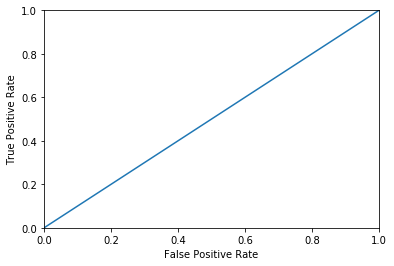

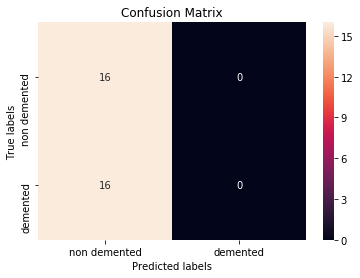

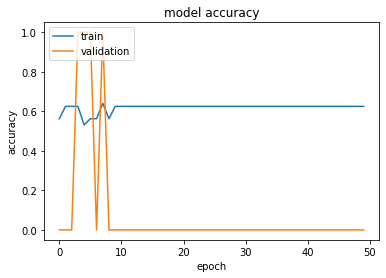

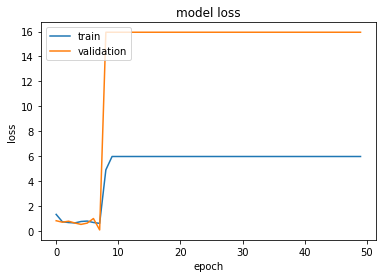

In [ ]:
performance(model,history)

In [ ]:
K.clear_session()
del model
del history

In [ ]:
from keras.applications.inception_v3 import InceptionV3
input_tensor = Input(shape=(91,109,91))
conv_base = InceptionV3(weights=None,include_top=False,input_tensor=input_tensor)
#conv_base.summary()

In [ ]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Model)         (None, 1, 2, 2048)        21828128  
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               1048832   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 22,877,217
Trainable params: 22,842,785
Non-trainable params: 34,432
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])

In [ ]:
history=model.fit(train_data,train_labels,epochs=50,batch_size=10,validation_split=0.2,verbose=1,shuffle=True)

Train on 64 samples, validate on 16 samples
Epoch 1/50
64/64 [==============================] - 23s 363ms/step - loss: 1.0176 - acc: 0.4219 - val_loss: 0.9209 - val_acc: 0.5000
Epoch 2/50
64/64 [==============================] - 10s 158ms/step - loss: 0.6282 - acc: 0.7188 - val_loss: 0.8975 - val_acc: 0.4375
Epoch 3/50
64/64 [==============================] - 10s 160ms/step - loss: 0.4911 - acc: 0.7656 - val_loss: 0.1228 - val_acc: 0.9375
Epoch 4/50
64/64 [==============================] - 10s 159ms/step - loss: 0.5743 - acc: 0.7031 - val_loss: 0.2239 - val_acc: 0.8750
Epoch 5/50
64/64 [==============================] - 10s 159ms/step - loss: 0.4198 - acc: 0.7813 - val_loss: 1.2384 - val_acc: 0.6250
Epoch 6/50
64/64 [==============================] - 10s 161ms/step - loss: 0.2854 - acc: 0.9062 - val_loss: 0.2180 - val_acc: 0.8750
Epoch 7/50
64/64 [==============================] - 10s 160ms/step - loss: 0.3385 - acc: 0.8750 - val_loss: 0.2602 - val_acc: 0.8750
Epoch 8/50
64/64 [=======

In [ ]:
[score,acc] = model.evaluate(test_data,test_labels, batch_size=10)
print('accuracy of the model is ',acc)

32/32 [==============================] - 1s 26ms/step
accuracy of the model is  1.0


the percentage of this area that is under this ROC curve 1.0
confusion matrix
 [[16  0]
 [ 0 16]]
              precision    recall  f1-score   support

    demented       1.00      1.00      1.00        16
non demented       1.00      1.00      1.00        16

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32



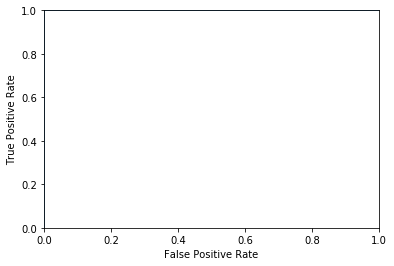

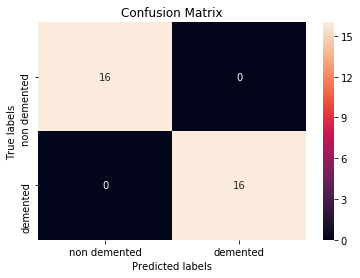

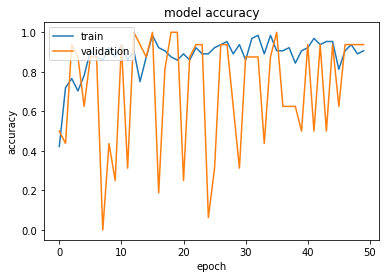

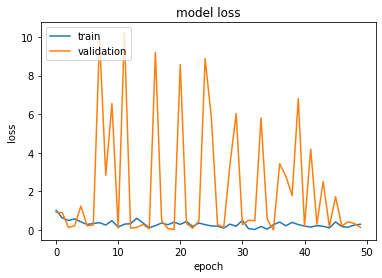

In [ ]:
performance(model,history)

In [ ]:
K.clear_session()
del model
del history

In [ ]:
from keras.applications.resnet50 import ResNet50

In [ ]:
input_tensor = Input(shape=(91,109,91))
conv_base = ResNet50(weights=None,include_top=False,input_tensor=input_tensor)
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 3, 4, 2048)        23863680  
_________________________________________________________________
flatten_1 (Flatten)          (None, 24576)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               6291712   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 30,155,649
Trainable params: 30,102,529
Non-trainable params: 53,120
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])

In [ ]:
history=model.fit(train_data,train_labels,epochs=10,batch_size=10,validation_split=0.2,verbose=1,shuffle=True)

Train on 64 samples, validate on 16 samples
Epoch 1/10
64/64 [==============================] - 30s 472ms/step - loss: 9.1266 - acc: 0.3906 - val_loss: 1.0000e-07 - val_acc: 1.0000
Epoch 2/10
64/64 [==============================] - 21s 320ms/step - loss: 10.0738 - acc: 0.3750 - val_loss: 1.0000e-07 - val_acc: 1.0000
Epoch 3/10
64/64 [==============================] - 20s 318ms/step - loss: 10.0738 - acc: 0.3750 - val_loss: 1.0000e-07 - val_acc: 1.0000
Epoch 4/10
64/64 [==============================] - 21s 328ms/step - loss: 10.0738 - acc: 0.3750 - val_loss: 1.0000e-07 - val_acc: 1.0000
Epoch 5/10
64/64 [==============================] - 21s 326ms/step - loss: 10.0738 - acc: 0.3750 - val_loss: 1.0000e-07 - val_acc: 1.0000
Epoch 6/10
64/64 [==============================] - 21s 326ms/step - loss: 10.0738 - acc: 0.3750 - val_loss: 1.0000e-07 - val_acc: 1.0000
Epoch 7/10
64/64 [==============================] - 21s 324ms/step - loss: 10.0738 - acc: 0.3750 - val_loss: 1.0000e-07 - val_acc

the percentage of this area that is under this ROC curve 0.5
confusion matrix
 [[ 0 16]
 [ 0 16]]
              precision    recall  f1-score   support

    demented       0.50      1.00      0.67        16
non demented       0.00      0.00      0.00        16

    accuracy                           0.50        32
   macro avg       0.25      0.50      0.33        32
weighted avg       0.25      0.50      0.33        32



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


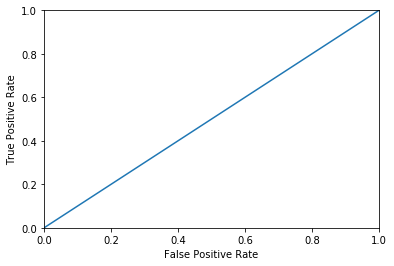

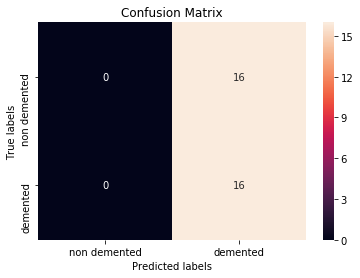

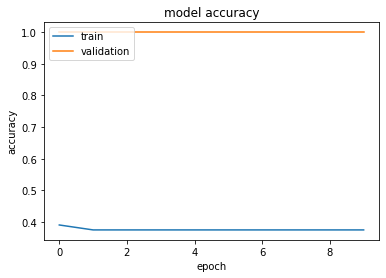

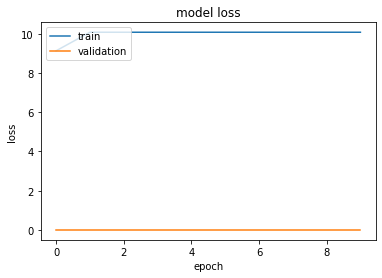

In [ ]:
performance(model,history)

In [ ]:
from keras.applications import Xception
conv_base = Xception(weights=None,include_top=False,input_tensor=input_tensor)
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Model)             (None, 3, 4, 2048)        20886824  
_________________________________________________________________
flatten_2 (Flatten)          (None, 24576)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               6291712   
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 257       
Total params: 27,178,793
Trainable params: 27,124,265
Non-trainable params: 54,528
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])
history=model.fit(train_data,train_labels,epochs=10,batch_size=10,validation_split=0.2,verbose=1,shuffle=True)
[score,acc] = model.evaluate(test_data,test_labels, batch_size=10)
print('accuracy of the model is ',acc)

Train on 64 samples, validate on 16 samples
Epoch 1/10
64/64 [==============================] - 30s 468ms/step - loss: 1.4273 - acc: 0.6563 - val_loss: 0.8112 - val_acc: 0.4375
Epoch 2/10
64/64 [==============================] - 17s 271ms/step - loss: 0.2743 - acc: 0.9062 - val_loss: 1.2275 - val_acc: 0.4375
Epoch 3/10
64/64 [==============================] - 17s 269ms/step - loss: 0.1547 - acc: 0.9219 - val_loss: 0.0908 - val_acc: 1.0000
Epoch 4/10
64/64 [==============================] - 17s 271ms/step - loss: 0.0224 - acc: 1.0000 - val_loss: 0.2639 - val_acc: 0.8750
Epoch 5/10
64/64 [==============================] - 17s 271ms/step - loss: 0.0060 - acc: 1.0000 - val_loss: 0.0220 - val_acc: 1.0000
Epoch 6/10
64/64 [==============================] - 17s 270ms/step - loss: 0.0026 - acc: 1.0000 - val_loss: 0.2195 - val_acc: 0.8750
Epoch 7/10
64/64 [==============================] - 17s 270ms/step - loss: 6.7452e-04 - acc: 1.0000 - val_loss: 0.2992 - val_acc: 0.8750
Epoch 8/10
64/64 [===

the percentage of this area that is under this ROC curve 0.96484375
confusion matrix
 [[16  0]
 [ 5 11]]
              precision    recall  f1-score   support

    demented       1.00      0.69      0.81        16
non demented       0.76      1.00      0.86        16

    accuracy                           0.84        32
   macro avg       0.88      0.84      0.84        32
weighted avg       0.88      0.84      0.84        32



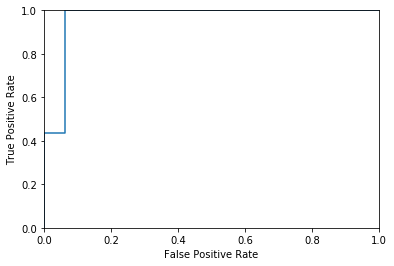

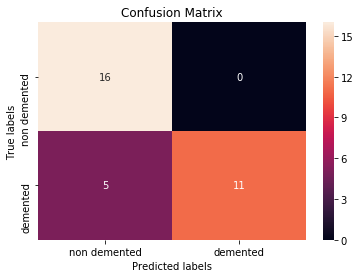

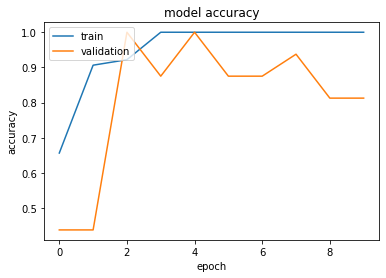

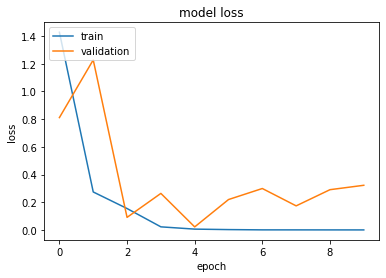

In [ ]:
performance(model,history)

In [ ]:
from keras.applications.mobilenet_v2 import MobileNetV2
conv_base = MobileNetV2(weights=None,include_top=False,input_tensor=input_tensor)
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_None (Model (None, 3, 4, 1280)        2283328   
_________________________________________________________________
flatten_3 (Flatten)          (None, 15360)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               3932416   
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 257       
Total params: 6,216,001
Trainable params: 6,181,889
Non-trainable params: 34,112
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])
history=model.fit(train_data,train_labels,epochs=20,batch_size=10,validation_split=0.2,verbose=1,shuffle=True)
[score,acc] = model.evaluate(test_data,test_labels, batch_size=10)
print('accuracy of the model is ',acc)

Train on 64 samples, validate on 16 samples
Epoch 1/20
64/64 [==============================] - 19s 296ms/step - loss: 0.7640 - acc: 0.8125 - val_loss: 2.3810 - val_acc: 0.3750
Epoch 2/20
64/64 [==============================] - 6s 97ms/step - loss: 0.0791 - acc: 0.9687 - val_loss: 3.9539 - val_acc: 0.4375
Epoch 3/20
64/64 [==============================] - 6s 98ms/step - loss: 0.0126 - acc: 1.0000 - val_loss: 2.7248 - val_acc: 0.4375
Epoch 4/20
64/64 [==============================] - 6s 97ms/step - loss: 0.0068 - acc: 1.0000 - val_loss: 3.6321 - val_acc: 0.4375
Epoch 5/20
64/64 [==============================] - 6s 97ms/step - loss: 0.0052 - acc: 1.0000 - val_loss: 1.7840 - val_acc: 0.5000
Epoch 6/20
64/64 [==============================] - 6s 97ms/step - loss: 0.0039 - acc: 1.0000 - val_loss: 2.0171 - val_acc: 0.5000
Epoch 7/20
64/64 [==============================] - 6s 97ms/step - loss: 0.0022 - acc: 1.0000 - val_loss: 3.8501 - val_acc: 0.4375
Epoch 8/20
64/64 [===================

the percentage of this area that is under this ROC curve 0.693359375
confusion matrix
 [[13  3]
 [ 8  8]]
              precision    recall  f1-score   support

    demented       0.73      0.50      0.59        16
non demented       0.62      0.81      0.70        16

    accuracy                           0.66        32
   macro avg       0.67      0.66      0.65        32
weighted avg       0.67      0.66      0.65        32



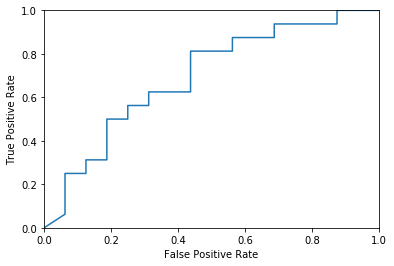

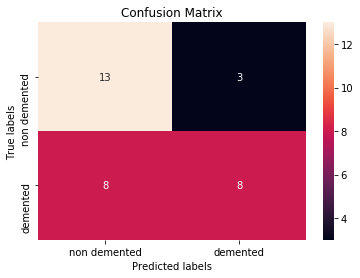

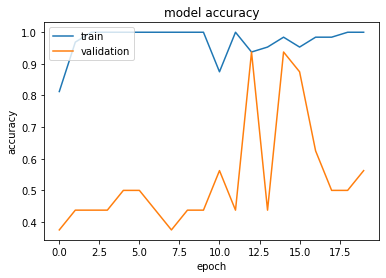

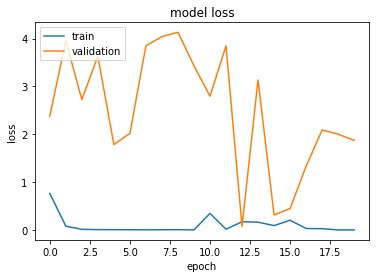

In [ ]:
performance(model,history)